# I. Import modules, configs

In [1]:
#Import libraries
import pandas as pd 
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns

#We can now use this folder and import our modules
sys.path.insert(0, "/home/apprenant/Documents/simplon_dev/pyhon_sql/zillow_price")

from src.utils.functions import *

# Pandas configurations 
sns.set()
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


#Import data
print('Loading data...')

train_2016 = pd.read_csv('../Data/raw_data/train_2016_v2.csv', low_memory=False)
properties_2016 = pd.read_csv('../Data/raw_data/properties_2016.csv',low_memory=False) 
train_2017 = pd.read_csv('../Data/raw_data/train_2017.csv',low_memory=False)
properties_2017 = pd.read_csv('../Data/raw_data/properties_2017.csv',low_memory=False) 

Loading data...


# II. Data exploratory

## II.1 Merging datasets

In [3]:
#Merging properties with the train dataset for exploratory analysis
print('Merging the data...')

df_train_2016 = train_2016.merge(properties_2016, how='left', on='parcelid')
df_train_2017 = train_2017.merge(properties_2017, how='left', on='parcelid')

full_df = pd.concat([df_train_2017,df_train_2016])
#Check the train dataset
print('Our dataset contains {} rows and {} columns.'.format(full_df.shape[0], full_df.shape[1]))

Merging the data...
Our dataset contains 167888 rows and 60 columns.


## II.2 Dataset analysis

In [14]:
full_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.03,2017-01-01,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,NaN,NaN,3100.00,3100.00,NaN,NaN,NaN,NaN,6059.00,NaN,3.00,2.00,633.00,NaN,NaN,33634931.00,-117869207.00,4506.00,NaN,NaN,NaN,NaN,NaN,122,261.00,NaN,60590630.07,53571.00,1286.00,NaN,96978.00,0.00,NaN,1.00,NaN,NaN,NaN,NaN,1998.00,NaN,NaN,485713.00,1023282.00,2016.00,537569.00,11013.72,NaN,NaN,60590630072012.00
1,17052889,0.06,2017-01-01,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,NaN,1465.00,1465.00,1465.00,NaN,NaN,1465.00,NaN,6111.00,1.00,1.00,1.00,0.00,NaN,NaN,34449266.00,-119281531.00,12647.00,NaN,NaN,NaN,NaN,NaN,1110,261.00,NaN,61110010.02,13091.00,2061.00,NaN,97099.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,1967.00,1.00,NaN,88000.00,464000.00,2016.00,376000.00,5672.48,NaN,NaN,61110010023006.00
2,14186244,0.01,2017-01-01,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,NaN,NaN,1243.00,1243.00,NaN,NaN,NaN,NaN,6059.00,NaN,2.00,2.00,440.00,NaN,NaN,33886168.00,-117823170.00,8432.00,1.00,NaN,NaN,NaN,1.00,122,261.00,NaN,60590218.02,21412.00,1286.00,NaN,97078.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,1962.00,1.00,NaN,85289.00,564778.00,2016.00,479489.00,6488.30,NaN,NaN,60590218022012.00
3,12177905,-0.10,2017-01-01,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,NaN,NaN,2376.00,2376.00,NaN,NaN,NaN,NaN,6037.00,NaN,3.00,NaN,NaN,NaN,2.00,34245180.00,-118240722.00,13038.00,1.00,NaN,NaN,NaN,1.00,0101,261.00,LCR110000*,60373001.00,396551.00,3101.00,NaN,96330.00,0.00,NaN,NaN,NaN,1.00,NaN,NaN,1970.00,NaN,NaN,108918.00,145143.00,2016.00,36225.00,1777.51,NaN,NaN,60373001001006.00
4,10887214,0.01,2017-01-01,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,NaN,NaN,1312.00,1312.00,NaN,NaN,NaN,NaN,6037.00,NaN,3.00,NaN,NaN,NaN,2.00,34185120.00,-118414640.00,278581.00,1.00,NaN,NaN,NaN,1.00,010C,266.00,LAR3,60371236.01,12447.00,3101.00,268548.00,96451.00,0.00,NaN,NaN,NaN,1.00,NaN,NaN,1964.00,NaN,NaN,73681.00,119407.00,2016.00,45726.00,1533.89,NaN,NaN,60371236012000.00


In [15]:
#Checking for variables types
full_df.dtypes

parcelid                          int64
logerror                        float64
transactiondate                  object
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object


We can see that most of our data are numerical values


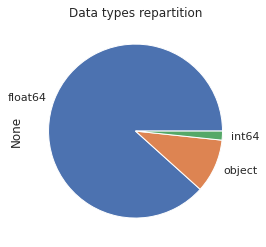

In [16]:
# Just as informations about our data types
sns.set_theme(style="whitegrid")
plt.title('Data types repartition')
full_df.dtypes.value_counts().plot.pie()
print('We can see that most of our data are numerical values')

In [6]:
#Renaming columns for better understanding of our features as they are a bit confusing at first
rename_columns(full_df)

In [18]:
full_df.head()

,parcelid,logerror,transactiondate,cooling_id,architecture_style_id,basement_sqft,bathroom_cnt,bedroom_cnt,framing_id,quality_id,bathroom_cnt_calc,deck_id,floor1_sqft,finished_area_sqft_calc,finished_area_sqft,perimeter_area,total_area,floor1_sqft_unk,base_total_area,fips,fireplace_cnt,bathroom_full_cnt,garage_cnt,garage_sqft,spa_flag,heating_id,latitude,longitude,lot_sqft,pool_cnt,pool_total_size,pool_unk_1,pool_unk_2,pool_unk_3,county_landuse_code,landuse_type_id,zoning_description,census_1,city_id,county_id,neighborhood_id,region_zip,room_cnt,story_id,bathroom_small_cnt,construction_id,unit_cnt,patio_sqft,storage_sqft,year_built,story_cnt,fireplace_flag,tax_structure,tax_parcel,tax_year,tax_land,tax_property,tax_overdue_flag,tax_overdue_year,census_2
0,14297519,0.03,2017-01-01,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,NaN,NaN,3100.00,3100.00,NaN,NaN,NaN,NaN,6059.00,NaN,3.00,2.00,633.00,NaN,NaN,33634931.00,-117869207.00,4506.00,NaN,NaN,NaN,NaN,NaN,122,261.00,NaN,60590630.07,53571.00,1286.00,NaN,96978.00,0.00,NaN,1.00,NaN,NaN,NaN,NaN,1998.00,NaN,NaN,485713.00,1023282.00,2016.00,537569.00,11013.72,NaN,NaN,60590630072012.00
1,17052889,0.06,2017-01-01,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,NaN,1465.00,1465.00,1465.00,NaN,NaN,1465.00,NaN,6111.00,1.00,1.00,1.00,0.00,NaN,NaN,34449266.00,-119281531.00,12647.00,NaN,NaN,NaN,NaN,NaN,1110,261.00,NaN,61110010.02,13091.00,2061.00,NaN,97099.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,1967.00,1.00,NaN,88000.00,464000.00,2016.00,376000.00,5672.48,NaN,NaN,61110010023006.00
2,14186244,0.01,2017-01-01,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,NaN,NaN,1243.00,1243.00,NaN,NaN,NaN,NaN,6059.00,NaN,2.00,2.00,440.00,NaN,NaN,33886168.00,-117823170.00,8432.00,1.00,NaN,NaN,NaN,1.00,122,261.00,NaN,60590218.02,21412.00,1286.00,NaN,97078.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,1962.00,1.00,NaN,85289.00,564778.00,2016.00,479489.00,6488.30,NaN,NaN,60590218022012.00
3,12177905,-0.10,2017-01-01,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,NaN,NaN,2376.00,2376.00,NaN,NaN,NaN,NaN,6037.00,NaN,3.00,NaN,NaN,NaN,2.00,34245180.00,-118240722.00,13038.00,1.00,NaN,NaN,NaN,1.00,0101,261.00,LCR110000*,60373001.00,396551.00,3101.00,NaN,96330.00,0.00,NaN,NaN,NaN,1.00,NaN,NaN,1970.00,NaN,NaN,108918.00,145143.00,2016.00,36225.00,1777.51,NaN,NaN,60373001001006.00
4,10887214,0.01,2017-01-01,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,NaN,NaN,1312.00,1312.00,NaN,NaN,NaN,NaN,6037.00,NaN,3.00,NaN,NaN,NaN,2.00,34185120.00,-118414640.00,278581.00,1.00,NaN,NaN,NaN,1.00,010C,266.00,LAR3,60371236.01,12447.00,3101.00,268548.00,96451.00,0.00,NaN,NaN,NaN,1.00,NaN,NaN,1964.00,NaN,NaN,73681.00,119407.00,2016.00,45726.00,1533.89,NaN,NaN,60371236012000.00


Text(0.5, 0, 'percentage')

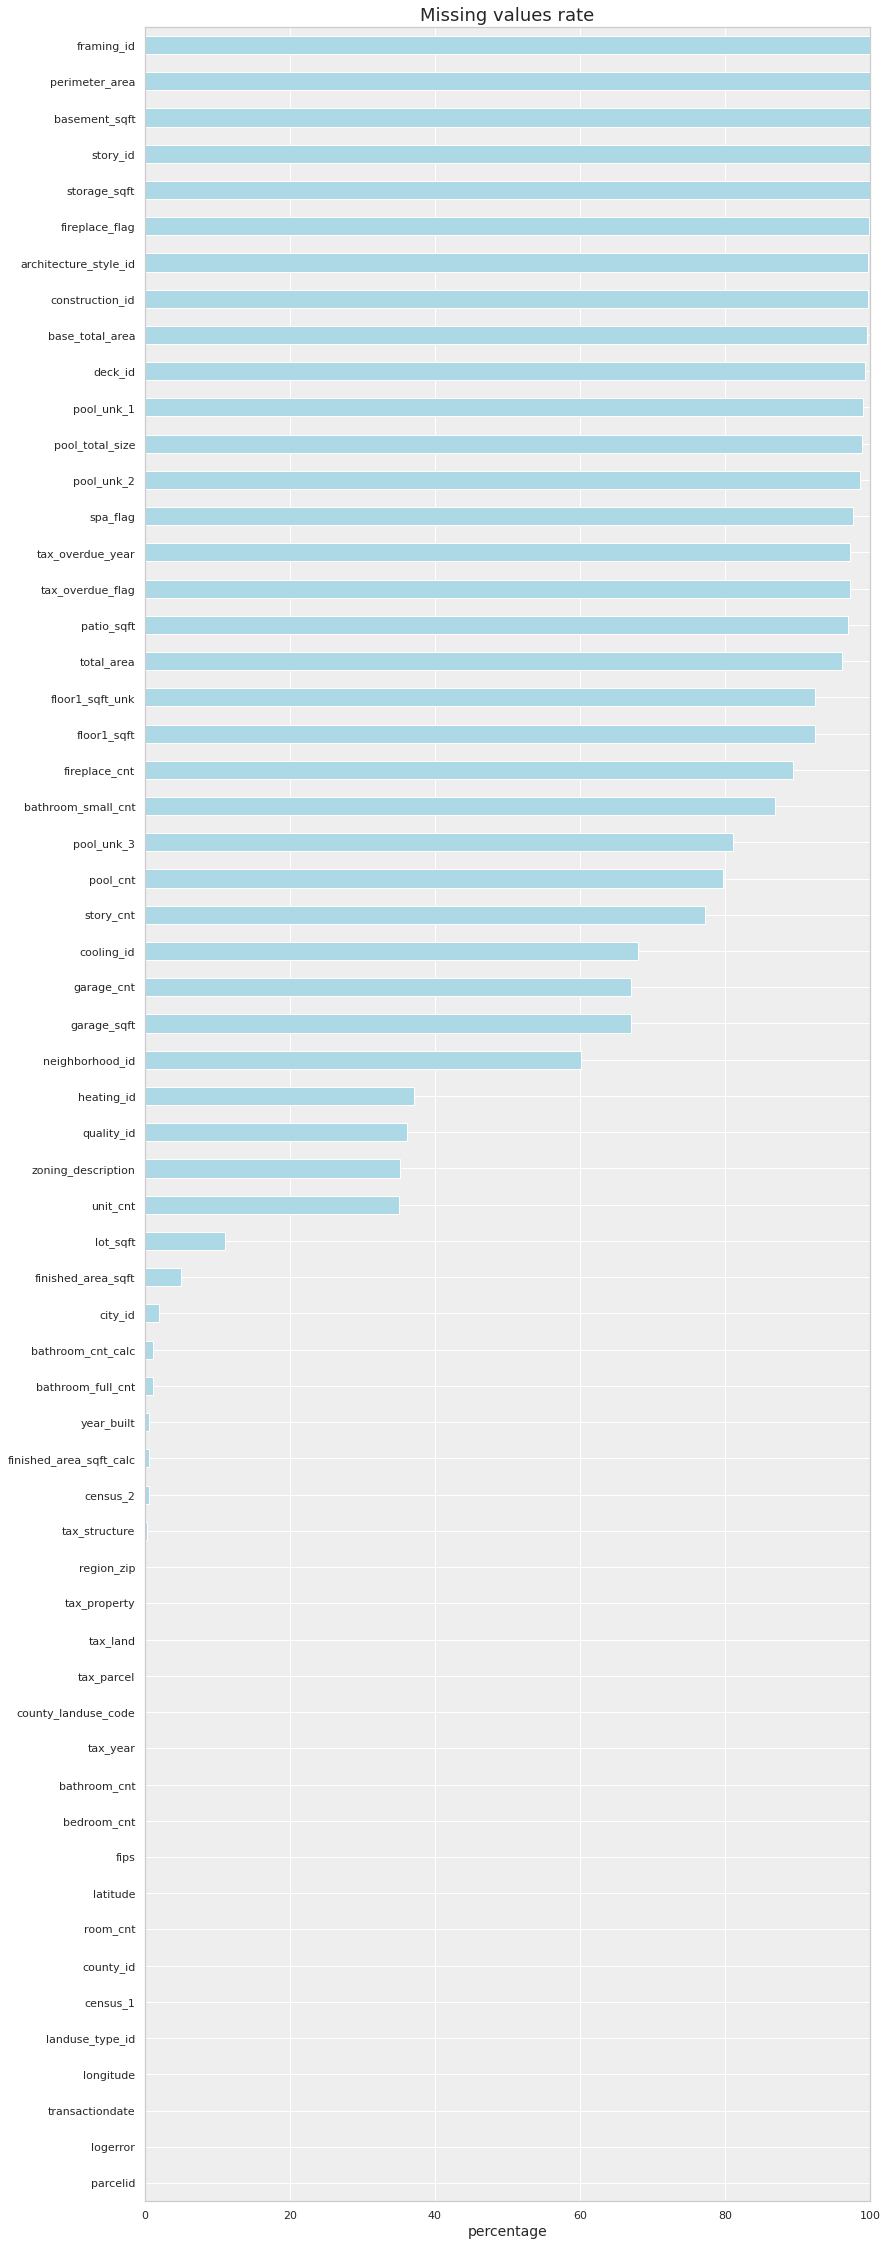

In [19]:
# Visualization of the  missing value per columns
plt.figure(figsize=(13, 40))
plt.rcParams['axes.facecolor'] = '#eee'
plt.rc('grid', color='#fff')
(full_df.isnull().mean(axis=0)*100).sort_values().plot.barh(color ="Lightblue")
plt.xlim(xmax=100)
plt.title("Missing values rate",fontsize=18)
plt.xlabel("percentage",fontsize=14)

In [20]:
full_df.describe()

,parcelid,logerror,cooling_id,architecture_style_id,basement_sqft,bathroom_cnt,bedroom_cnt,framing_id,quality_id,bathroom_cnt_calc,deck_id,floor1_sqft,finished_area_sqft_calc,finished_area_sqft,perimeter_area,total_area,floor1_sqft_unk,base_total_area,fips,fireplace_cnt,bathroom_full_cnt,garage_cnt,garage_sqft,heating_id,latitude,longitude,lot_sqft,pool_cnt,pool_total_size,pool_unk_1,pool_unk_2,pool_unk_3,landuse_type_id,census_1,city_id,county_id,neighborhood_id,region_zip,room_cnt,story_id,bathroom_small_cnt,construction_id,unit_cnt,patio_sqft,storage_sqft,year_built,story_cnt,tax_structure,tax_parcel,tax_year,tax_land,tax_property,tax_overdue_year,census_2
count,167888.00,167888.00,53788.00,468.00,93.00,167854.00,167854.00,31.00,107173.00,166056.00,1272.00,12893.00,166992.00,159519.00,75.00,6591.00,12893.00,807.00,167854.00,17896.00,166056.00,55457.00,55457.00,105651.00,167854.00,167854.00,149446.00,34075.00,1838.00,1626.00,2278.00,31776.00,167854.00,167854.00,164579.00,167854.00,66986.00,167769.00,167854.00,93.00,22115.00,522.00,109056.00,5039.00,165.00,166828.00,38169.00,167359.00,167852.00,167854.00,167851.00,167843.00,4683.00,167002.00
mean,12995358.54,0.01,1.81,7.30,695.38,2.29,3.04,3.97,6.02,2.31,66.00,1356.49,1778.63,1752.33,1395.71,2368.33,1367.65,2197.29,6048.84,1.19,2.25,1.81,347.60,3.92,34006778.00,-118201116.77,29510.60,1.00,518.93,1.00,1.00,1.00,261.83,60491540.44,33725.13,2529.62,189295.69,96586.39,1.48,7.00,1.01,6.02,1.11,307.92,271.26,1968.57,1.44,184346.02,472683.32,2015.46,288880.47,5989.52,13.83,60493900409906.88
std,3016071.40,0.17,2.97,2.72,583.95,1.00,1.15,0.18,1.88,0.98,0.00,661.07,940.36,921.36,116.54,1124.30,698.67,1300.55,20.70,0.49,0.96,0.60,264.57,3.64,265117.53,360058.61,122458.82,0.00,155.73,0.00,0.00,0.00,5.16,205443.72,46922.47,803.75,165687.73,3723.01,2.82,0.00,0.11,0.49,0.99,227.43,293.61,23.78,0.54,219284.07,602837.21,0.50,445645.12,7214.73,2.42,1054136570824.81
min,10711738.00,-4.66,1.00,2.00,38.00,0.00,0.00,3.00,1.00,1.00,66.00,44.00,2.00,2.00,1056.00,560.00,44.00,257.00,6037.00,1.00,1.00,0.00,0.00,1.00,33339295.00,-119475416.00,167.00,1.00,24.00,1.00,1.00,1.00,31.00,60371011.10,3491.00,1286.00,6952.00,95982.00,0.00,7.00,1.00,4.00,1.00,11.00,12.00,1824.00,1.00,44.00,22.00,2015.00,22.00,19.92,3.00,60371011101000.00
25%,11548985.75,-0.03,1.00,7.00,280.00,2.00,2.00,4.00,4.00,2.00,66.00,945.00,1183.00,1172.00,1344.00,1634.00,945.00,1057.00,6037.00,1.00,2.00,2.00,0.00,2.00,33812924.25,-118413024.75,5702.00,1.00,420.00,1.00,1.00,1.00,261.00,60373116.00,12447.00,1286.00,46736.00,96193.00,0.00,7.00,1.00,6.00,1.00,175.00,88.00,1953.00,1.00,82568.00,202652.25,2015.00,83730.00,2798.07,13.00,60373116002004.00
50%,12540601.00,0.01,1.00,7.00,588.00,2.00,3.00,4.00,7.00,2.00,66.00,1252.00,1541.00,1520.00,1440.00,2099.00,1252.00,1886.00,6037.00,1.00,2.00,2.00,434.00,2.00,34021700.00,-118176852.00,7200.00,1.00,500.00,1.00,1.00,1.00,261.00,60376037.03,25218.00,3101.00,118872.00,96389.00,0.00,7.00,1.00,6.00,1.00,252.00,160.00,1970.00,1.00,134051.00,350000.00,2015.00,197776.00,4501.04,14.00,60376037031002.00
75%,14219303.00,0.04,1.00,7.00,819.00,3.00,4.00,4.00,7.00,3.00,66.00,1615.00,2103.00,2065.00,1440.00,2845.00,1619.00,3240.00,6059.00,1.00,3.00,2.00,488.00,7.00,34173420.00,-117924692.50,11746.75,1.00,600.00,1.00,1.00,1.00,266.00,60590423.29,45457.00,3101.00,274765.00,96987.00,0.00,7.00,1.00,6.00,1.00,375.00,320.00,1987.00,2.00,214257.00,554002.00,2016.00,355334.00,6914.16,15.00,60590423281017.00
max,167689317.00,5.26,13.00,21.00,3560.00,20.00,16.00,4.00,12.00,20.00,66.00,7625.00,35640.00,21929.00,1584.00,35640.00,12467.00,7224.00,6111.00,5.00,20.00,24.00,7339.00,24.00,34818767.00,-117554636.00,6971010.00,1.00,1750.00,1.00,1.00,1.00,275.00,61110091.00,396556.00,3101.00,764167.00,399675.00,18.00,7.00,7.00,13.00,237.00,3191.00,1366.00,2016.00,6.00,11421790.00,49061236.00,2016.00,48952198.00,586639.30,99.00,483030105084015.00


In [7]:
# Saving the merged dataset into a new csv file
full_df.to_csv('../Data/intermediate_data/train_set.csv')